In [5]:
data = pd.read_csv("creditcard.csv")

In [6]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49605,44132,-1.211298,-0.450385,1.440502,0.354908,-0.408886,1.636777,-0.951234,1.185703,-1.020024,...,0.086607,0.526001,0.191522,-1.026321,-0.529712,-0.057442,0.125643,0.000680,79.00,0.0
49606,44132,1.176642,0.154754,0.246080,0.800814,-0.590838,-1.487705,0.336949,-0.316725,-0.047056,...,-0.008572,-0.105115,-0.017629,0.937907,0.463495,0.332980,-0.062039,0.016149,40.00,0.0
49607,44133,-1.103844,0.186527,1.568397,1.307678,0.316942,0.290415,1.147621,-0.222930,0.000022,...,-0.160645,0.468407,0.389831,0.213000,-0.015877,-0.278962,0.322504,-0.270168,108.00,0.0
49608,44134,-0.262018,0.851831,1.459865,1.057694,-0.725526,0.274325,1.750817,-1.097029,0.439934,...,-0.272138,0.032569,-0.141121,0.476174,-0.587678,0.288669,-0.914934,-0.676786,172.82,0.0


Normal Transaction Amount Statistics:
count    49461.000000
mean        93.099593
std        253.325102
min          0.000000
25%          7.680000
50%         25.000000
75%         85.000000
max      12910.930000
Name: Amount, dtype: float64


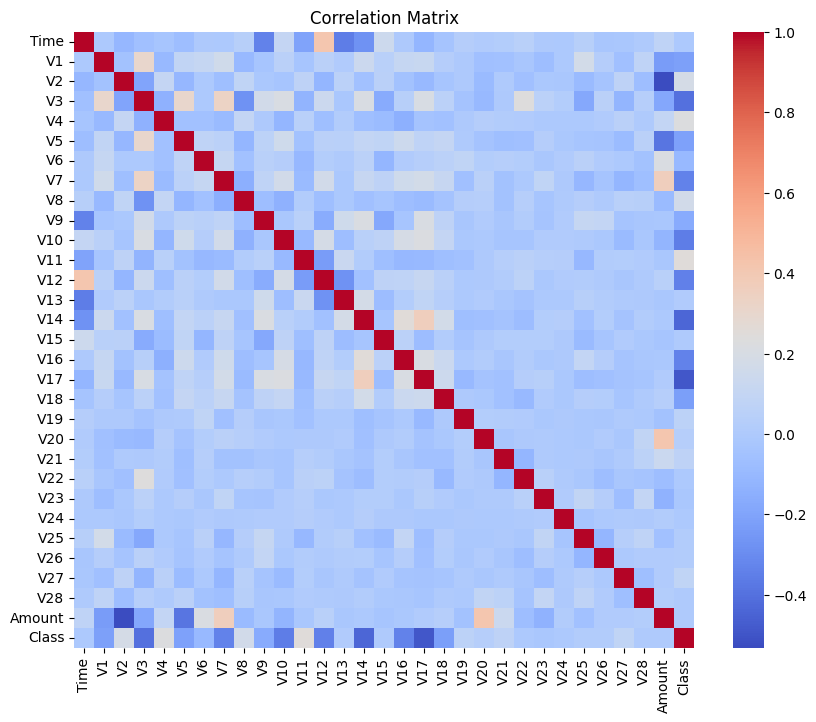

Accuracy: 0.9996976416045152
Precision: 1.0
Recall: 0.9032258064516129
F1 Score: 0.9491525423728813
Confusion Matrix:
[[9891    0]
 [   3   28]]


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.impute import SimpleImputer

# Step 1: Load and preprocess the dataset

imputer = SimpleImputer(strategy="mean")
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

X = data_imputed.drop("Class", axis=1)
y = data_imputed["Class"].astype(int)



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Train a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Step 3: Evaluate the model's performance
y_pred = rf_classifier.predict(X_test)

# Step 4: Print the amount details for Normal Transactions
normal_transactions = data[data["Class"] == 0]
print("Normal Transaction Amount Statistics:")
print(normal_transactions["Amount"].describe())

# Step 5: Plot the Correlation Matrix
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False)
plt.title("Correlation Matrix")
plt.show()

# Step 6: Calculate and print accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Step 7: Print the confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion)


In [10]:
!pip install yfinance


[*********************100%%**********************]  1 of 1 completed


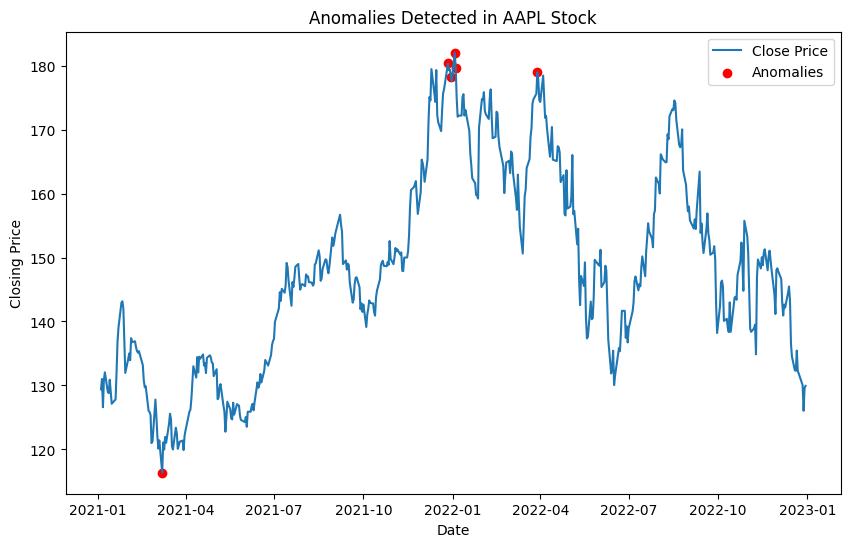

Detected Anomalies:
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2021-03-08  120.930000  121.000000  116.209999  116.360001  114.662354   
2021-12-27  177.089996  180.419998  177.070007  180.330002  178.527756   
2021-12-30  179.470001  180.570007  178.089996  178.199997  176.419067   
2022-01-03  177.830002  182.880005  177.710007  182.009995  180.190994   
2022-01-04  182.630005  182.940002  179.119995  179.699997  177.904068   
2022-03-29  176.690002  179.009995  176.339996  178.960007  177.397156   

               Volume  Anomaly  
Date                            
2021-03-08  154376600       -1  
2021-12-27   74919600       -1  
2021-12-30   59773000       -1  
2022-01-03  104487900       -1  
2022-01-04   99310400       -1  
2022-03-29  100589400       -1  


In [11]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

# Define the stock symbol (e.g., Apple Inc. as 'AAPL')
stock_symbol = 'AAPL'

# Define the start and end dates for the data retrieval
start_date = '2021-01-01'
end_date = '2022-12-31'

# Fetch historical stock data
data = yf.download(stock_symbol, start=start_date, end=end_date)

# Extract the 'Close' prices as the feature for analysis
closing_prices = data['Close'].values.reshape(-1, 1)

# Standardize the feature using StandardScaler
scaler = StandardScaler()
closing_prices_scaled = scaler.fit_transform(closing_prices)

# Anomaly detection using Isolation Forest
clf = IsolationForest(contamination=0.01)  # Adjust contamination as needed
data['Anomaly'] = clf.fit_predict(closing_prices_scaled)

# Plot the detected anomalies
anomalies = data[data['Anomaly'] == -1]
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Close'], label='Close Price')
plt.scatter(anomalies.index, anomalies['Close'], c='red', label='Anomalies')
plt.legend()
plt.title('Anomalies Detected in AAPL Stock')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

# Print detected anomalies
print("Detected Anomalies:")
print(anomalies)
